<IPython.core.display.Javascript object>


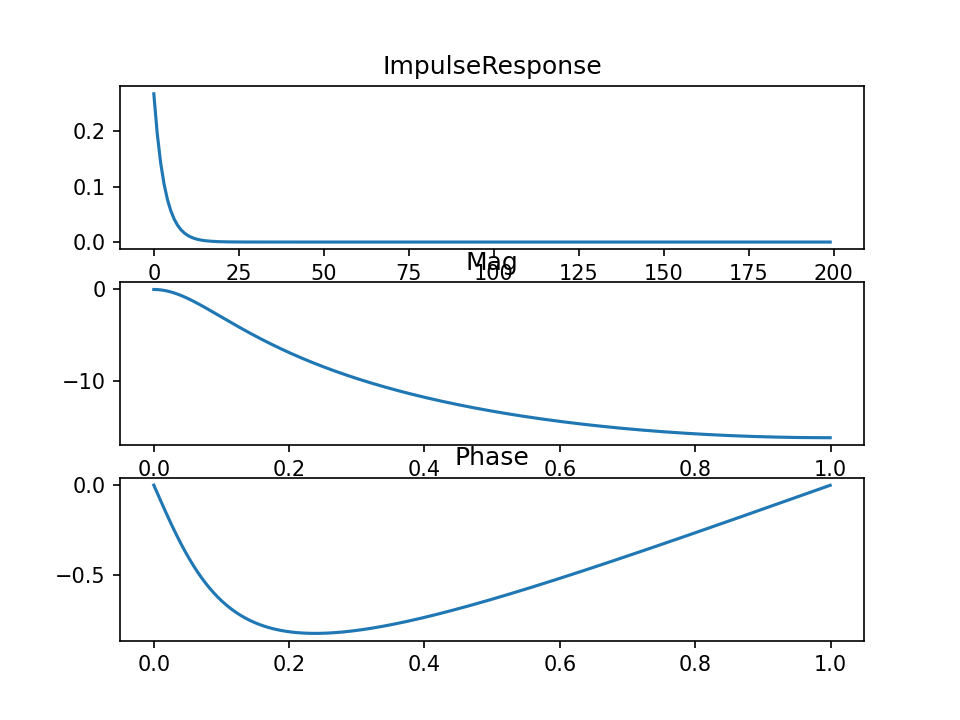

In [96]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

N = 4096
f = 0.1

# Impulse
x = np.zeros(N)
x[0] = 1

class OnePoleFilter:
    def __init__(self):
        self.alpha = 1.0
        self.out = 0.0
    
    def processLP(self, x):
        self.out += self.alpha * (x - self.out)
        return self.out
    
    def processHP(self, x):
        return x - self.processLP(x)
    
    def calculateAlpha(self, normFreq):
        if (normFreq <= 0.0):
            return 0.0
        elif (normFreq >= 1.0):
            return 1.0
        else:
            w = normFreq * np.pi
            return np.cos(w) - 1.0 + np.sqrt((np.cos(w) * np.cos(w)) - (4.0 * np.cos(w)) + 3.0);
            
    def setFrequency(self, normFreq):
        self.alpha = self.calculateAlpha(normFreq)
        
lowpass = OnePoleFilter()
lowpass.setFrequency(f)

highpass = OnePoleFilter()
highpass.setFrequency(f)

for i in np.arange(0,N):
    xLP = lowpass.processLP(x[i])
    xHP = highpass.processHP(x[i])
    x[i] = xLP# + xHP
 
fig, (sig, mag, phase) = plt.subplots(3, 1)

sig.plot(x[:200])
sig.set_title("ImpulseResponse")

freqs = sp.fft.fftfreq(N)[:N//2] * 2
X = sp.fft.fft(x)[:N//2]

mag.plot(freqs, 20 * np.log10(np.abs(X)))
mag.set_title("Mag")

phase.plot(freqs, np.angle(X))
phase.set_title("Phase")

plt.show()